Gradient Descent

Reducing Loss: Optimizing Learning Rate

https://developers.google.com/machine-learning/crash-course/fitter/graph

In [340]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [341]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

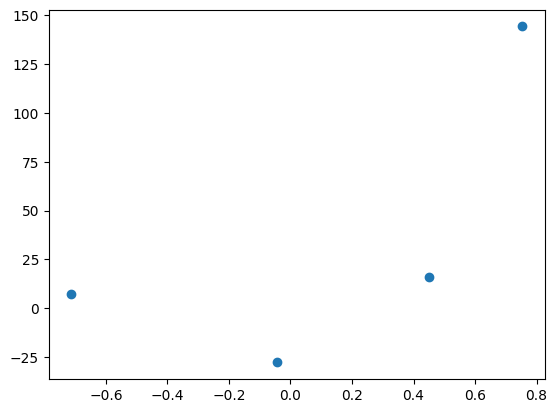

In [342]:
plt.scatter(X,y)

Lets apply `OLS`

In [343]:
from sklearn.linear_model import LinearRegression

In [344]:
lr = LinearRegression()

In [345]:
lr.fit(X,y)

LinearRegression()

In [346]:
lr.coef_,lr.intercept_

(array([78.35063668]), 26.15963284313262)

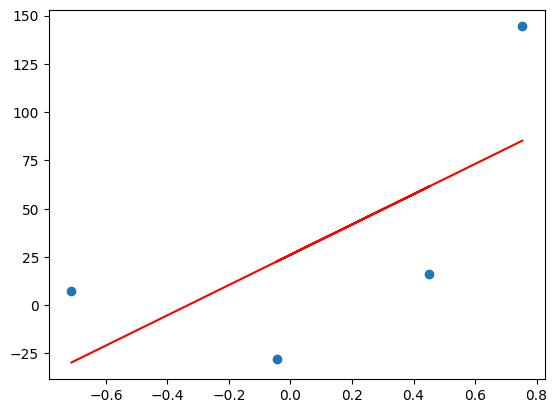

In [347]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red")

Now apply `Gradient Descent` assuming slope is constant `m = 78.35`
and starting `b = 0`

In [348]:
y_pred = ((78.35*X)+0).reshape(4)


In [349]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

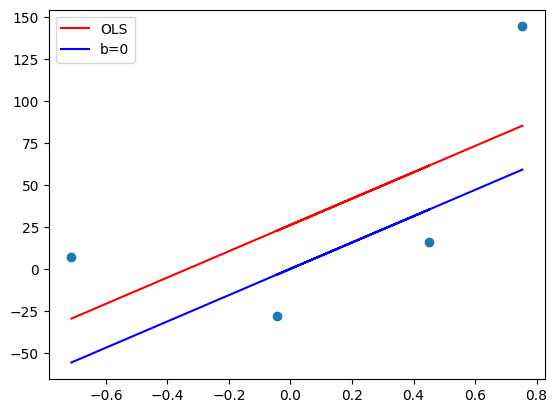

In [350]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b=0')
plt.legend()
plt.show()

In [351]:
# interation 1
m = 78.35
b=0
loss_slope = -2 * np.sum(y - m * X.ravel() -b)
loss_slope

-209.27763408209216

In [352]:
learning_rate = 0.1
step_size = loss_slope * learning_rate
step_size

-20.927763408209216

In [353]:
b = b - step_size
b

20.927763408209216

In [354]:
y_pred1 = ((78.35*X)+b).reshape(4)
y_pred1

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

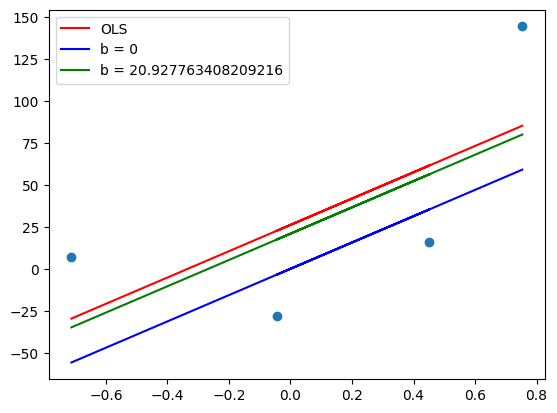

In [355]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b = 0')
plt.plot(X,y_pred1,color="green",label='b = {}'.format(b))
plt.legend()
plt.show()

In [356]:
# interation 2
loss_slope = -2 * np.sum(y - m * X.ravel() -b)
loss_slope

-41.85552681641843

In [357]:
step_size = loss_slope * learning_rate
step_size

-4.185552681641844

In [358]:
b2 = b - step_size
b2

25.11331608985106

In [359]:
y_pred2 = ((78.35*X)+b).reshape(4)
y_pred2

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

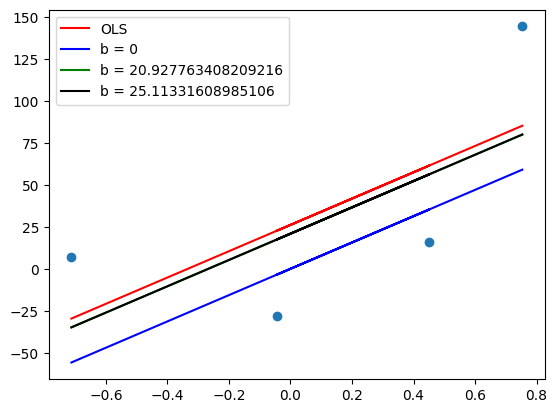

In [360]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b = 0')
plt.plot(X,y_pred1,color="green",label='b = {}'.format(b))
plt.plot(X,y_pred2,color="black",label='b = {}'.format(b2))
plt.legend()
plt.show()

In [361]:
# interation 3
loss_slope = -2 * np.sum(y - m * X.ravel() -b2)
loss_slope

-8.371105363283675

In [362]:
step_size = loss_slope * learning_rate
step_size

-0.8371105363283675

In [363]:
b3 = b2 - step_size
b3

25.95042662617943

In [364]:
y_pred3 = ((78.35*X)+b3).reshape(4)
y_pred3

array([-29.86538175,  61.34992337,  22.46361044,  85.00802239])

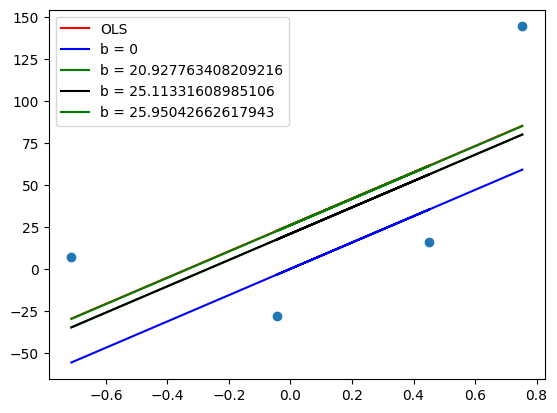

In [365]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b = 0')
plt.plot(X,y_pred1,color="green",label='b = {}'.format(b))
plt.plot(X,y_pred2,color="black",label='b = {}'.format(b2))
plt.plot(X,y_pred3,color="green",label='b = {}'.format(b3))
plt.legend()
plt.show()

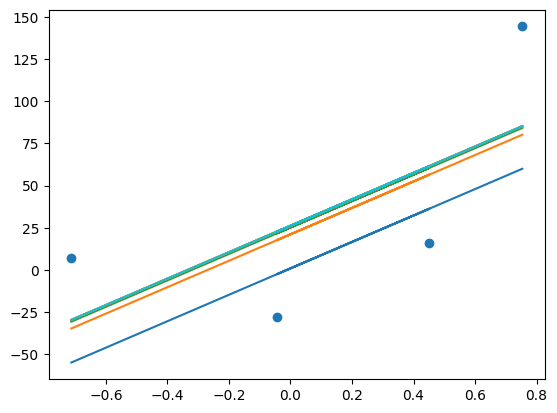

In [366]:
# now using epochs or loop

b = -100
m = 78.35
learning_rate = 0.1
epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * X.ravel() -b)
    b = b -  (learning_rate * loss_slope)

    y_pred = m * X + b

    plt.plot(X,y_pred)

plt.scatter(X,y)
    

### Making a GD_regression only for b

In [413]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=2)

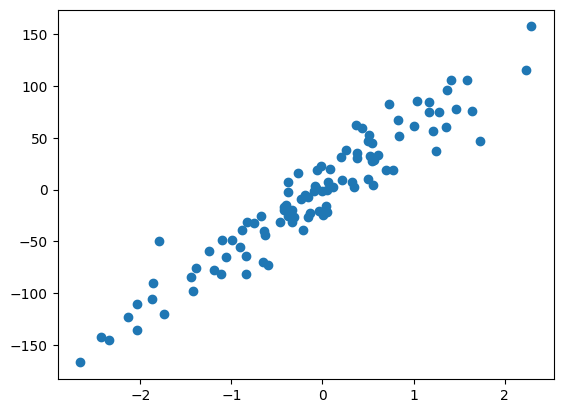

In [414]:
plt.scatter(X,y)

In [415]:
lr = LinearRegression()

In [416]:
lr.fit(X,y)
lr.coef_,lr.intercept_

(array([58.11865999]), 0.5334392393890024)

In [417]:
m = 58.11865999

In [433]:
class GDRegression:

    def __init__(self,learning_rate,epochs) -> None:
        self.m = 58.11865999
        self.b = -100
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
            self.b = self.b -  (self.learning_rate * loss_slope)
        print(self.b)


In [435]:
gdr = GDRegression(0.001,100)
gdr.fit(X,y)

0.5334392185248703


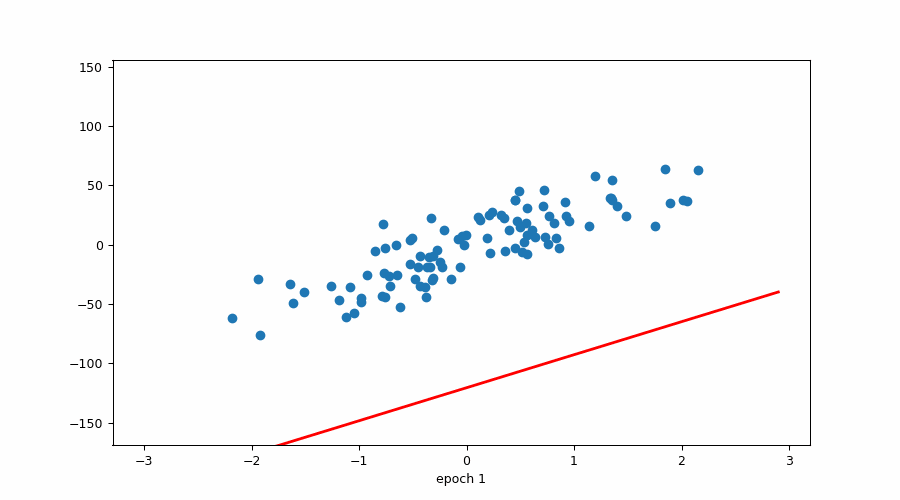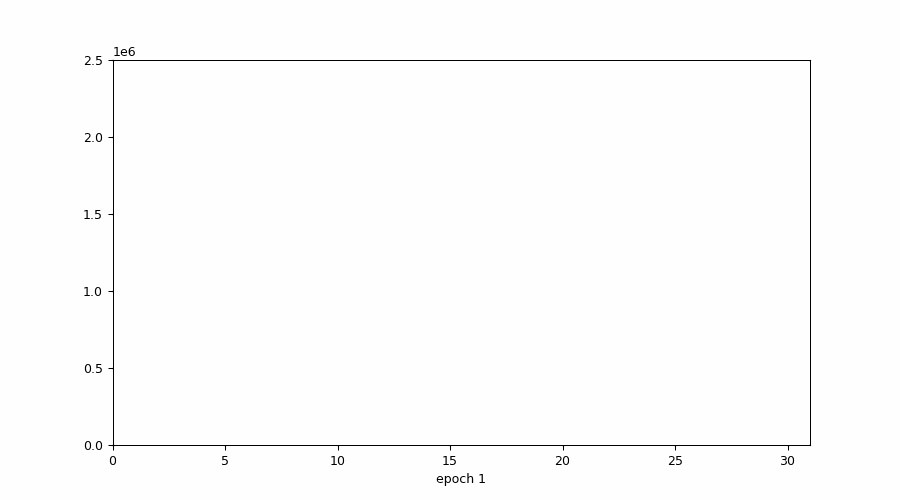